## Project: Subscription Cancellation during trial time prediction and Strategies for retention

#### Business Scenario:
A streaming company offers a 30-day trial period to attract new members to their platform. During this trial period, users have access to the company's library of songs. The goal is to convert trial users into paying subscribers and retain them as long-term customers.

#### Problem:
Despite offering a trial experience, the streaming company is experiencing a high churn rate during the 30-day trial period. Many trial users decide to cancel their subscription before the trial ends and do not convert into paying subscribers. This high churn rate is impacting the company's growth and revenue potential, making it crucial to identify the reasons behind this early cancellation and find effective solutions to retain trial users as loyal customers.

### Dataset

The dataset provided to find a solution has 19543 rows and 15 variables, where:

Variable  |Description |
-----|-----| 
user|User Id |
num_25|# of songs played less than 25% of the song length 
num_50|# of songs played between 25% to 50% of the song length
num_75|# of songs played between 50% to 75% of of the song length
num_985|# of songs played between 75% to 98.5% of the song length
num_100| # of songs played over 98.5% of the song length
num_unq|# of unique songs played
total_min|total minutes played
payment_plan_days|length of membership plan in days
is_auto_renew|Whether or not the plan is auto renew [0&ndash;1]|
transaction_date|Date when member subscribed
age| Member's age
gender| Member's gender
is_churn| Whether or not the member churned [0&ndash;1]|
plan_type| Plan type the member subscribed

### Deliverables

Deliverables will include the model evaluation (and interpretation), a data visualizations directly related to the question  asked, ethical considerations, and the resources used to troubleshoot and find answers or solutions.

## Step 1: Imports

* Packages
* Dataset

#### Import initial packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

#### Load Dataset

In [2]:
#loading dataset into a dataframe

df = pd.read_csv('streaming_.csv')

df.head(10)

,Unnamed: 0,user,num_25,num_50,num_75,num_985,num_100,num_unq,total_min,payment_plan_days,is_auto_renew,transaction_date,age,gender,is_churn,plan_type
0,0,BtvdmgYsrARGNgK4ZHjdMQhwcZ33esLoMuCRO3D3n5g=,1,0,0,0,3,1,12,30,1,20170307,0,NaN,0,Plus
1,1,hxktQbNc3D9m7B4lkAc+S0SlV2vK7JcJubx4d2mRgBg=,226,63,47,40,1647,1390,7136,30,1,20170331,22,male,0,Premium
2,2,NXulo2V/zXNPvMhExku0RiLD+BigJarvCTesSHH562s=,7,1,1,2,462,358,2118,30,1,20170304,33,male,0,Plus
3,3,H6bBesLZsdcBcYDQnoXCuQ0/ANe/peqzg9KRlwycpuQ=,191,23,12,19,242,347,1086,30,0,20170301,25,female,0,Elite
4,4,VFcm7LNceIUkdI/w16ysQ6gPB398UTFzzLEmVZIUC7U=,68,9,1,2,151,163,652,30,1,20170324,28,female,0,Plus
5,5,ZpcAq/CR5FBDMxxkofNxiraPi2ZniSTBx2L7SrwXtlg=,54,11,9,10,91,165,420,30,1,20170310,33,female,0,Premium
6,6,CZW4qIwqRotmPpfHnDtAnKcjvQnuWRglSqPRX9W5Jbs=,117,46,24,44,528,550,2619,30,1,20170331,22,male,0,Plus
7,7,vPHa5aaLtkphmNknwQgoDLOCIyf/IITBJfwLONv8FU4=,26,9,5,5,74,111,373,30,1,20170304,0,NaN,0,Premium
8,8,mccLeh37MWMVeo3w0ARwPpplhzU2AOoR1XtPSvlxG8Q=,208,33,16,14,619,811,2498,30,0,20170328,23,male,0,Plus
9,9,8pII0DXJAUTm891YCty8UUw87enAw28y6Tqvj+ritCM=,69,36,23,34,574,602,2777,30,1,20170305,32,male,0,Elite


In [3]:
df = df.drop('Unnamed: 0', axis=1)

## Step 2. Data Exploration (Initial EDA and data cleaning)

* Clean dataset (missing data, redundant data, outliers)
* Understand variables


In [4]:
#gathering basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19543 entries, 0 to 19542
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user               19543 non-null  object
 1   num_25             19543 non-null  int64 
 2   num_50             19543 non-null  int64 
 3   num_75             19543 non-null  int64 
 4   num_985            19543 non-null  int64 
 5   num_100            19543 non-null  int64 
 6   num_unq            19543 non-null  int64 
 7   total_min          19543 non-null  int64 
 8   payment_plan_days  19543 non-null  int64 
 9   is_auto_renew      19543 non-null  int64 
 10  transaction_date   19543 non-null  int64 
 11  age                19543 non-null  int64 
 12  gender             10417 non-null  object
 13  is_churn           19543 non-null  int64 
 14  plan_type          19543 non-null  object
dtypes: int64(12), object(3)
memory usage: 2.2+ MB


For now, let's just change the transaction_date to datetype and add others variable related to date

In [5]:
import datetime as dt
#converting to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%Y%m%d')

#creating new columns called end_trial (transaction_date + 30 days) 
df['end_trial'] = df['transaction_date'] + dt.timedelta(days=30)

#creating day columns for transaction and end_trial
df['transaction_day'] = df['transaction_date'].dt.strftime('%d').astype('int')
df['last_day'] = df['end_trial'].dt.strftime('%d').astype('int')


In [6]:
#gathering basic descriptive statistics about the data

df.describe()

,num_25,num_50,num_75,num_985,num_100,num_unq,total_min,payment_plan_days,is_auto_renew,age,is_churn,transaction_day,last_day
count,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.0,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000
mean,115.016784,26.015351,16.542701,19.250985,544.069744,518.892135,2367.763445,30.0,0.785038,16.006089,0.316584,18.127053,18.198639
std,158.200240,36.036021,21.895891,45.172652,761.985411,604.364608,3112.253640,0.0,0.410806,17.827352,0.465155,9.754959,9.801167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.0,0.000000,0.000000,0.000000,1.000000,1.000000
25%,28.000000,5.000000,3.000000,3.000000,110.000000,125.000000,515.000000,30.0,1.000000,0.000000,0.000000,10.000000,10.000000
50%,64.000000,14.000000,10.000000,10.000000,312.000000,335.000000,1403.000000,30.0,1.000000,19.000000,0.000000,19.000000,19.000000
75%,141.000000,33.000000,22.000000,23.000000,673.000000,691.000000,2979.000000,30.0,1.000000,29.000000,1.000000,28.000000,30.000000
max,3123.000000,674.000000,434.000000,2745.000000,14223.000000,8893.000000,43544.000000,30.0,1.000000,1029.000000,1.000000,31.000000,31.000000


Here it's already possible identify that age has innacurate values as min and max values are 0 and 1029, respectively.

All variables related to number  of songs and total minutes played have min values equal to 0, thus, there's no negative values where couldn't have it. 

Also, the payment_plan_days variable is constant equal to 30, that is the number of trial days, thus, it won't be necessary for our analysis. 

In [7]:
#checking for missing values

df.isna().sum()

user                    0
num_25                  0
num_50                  0
num_75                  0
num_985                 0
num_100                 0
num_unq                 0
total_min               0
payment_plan_days       0
is_auto_renew           0
transaction_date        0
age                     0
gender               9126
is_churn                0
plan_type               0
end_trial               0
transaction_day         0
last_day                0
dtype: int64

Only gender variable has missing values. It'll be kept this way as it won't be a major problem now. 

In [8]:
# checking for duplicate rows

df.duplicated().sum()

19

In [9]:
#inspecting duplicates rows

df[df.duplicated()].sort_values(by=list(df.columns))

,user,num_25,num_50,num_75,num_985,num_100,num_unq,total_min,payment_plan_days,is_auto_renew,transaction_date,age,gender,is_churn,plan_type,end_trial,transaction_day,last_day
13790,6wVnvLiCjvoZRph0XH+YMh+FU3mBZ0RZvOjjZcJ8L8c=,64,25,6,5,882,322,3657,30,0,2017-03-10,0,NaN,1,Elite,2017-04-09,10,9
15754,Cb4XS2qU2qnJ5f5iUaWIGOnVf1QWDtq1gYBZ9CRs8yU=,41,5,7,6,240,217,1035,30,0,2017-02-09,35,female,1,Elite,2017-03-11,9,11
16176,Cb4XS2qU2qnJ5f5iUaWIGOnVf1QWDtq1gYBZ9CRs8yU=,41,5,7,6,240,217,1035,30,0,2017-02-09,35,female,1,Elite,2017-03-11,9,11
16503,Cb4XS2qU2qnJ5f5iUaWIGOnVf1QWDtq1gYBZ9CRs8yU=,41,5,7,6,240,217,1035,30,0,2017-02-09,35,female,1,Elite,2017-03-11,9,11
18233,Cb4XS2qU2qnJ5f5iUaWIGOnVf1QWDtq1gYBZ9CRs8yU=,41,5,7,6,240,217,1035,30,0,2017-02-09,35,female,1,Elite,2017-03-11,9,11
15301,Cb4XS2qU2qnJ5f5iUaWIGOnVf1QWDtq1gYBZ9CRs8yU=,41,5,7,6,240,217,1035,30,1,2017-02-09,35,female,1,Elite,2017-03-11,9,11
8595,DlKPB7r9AYVtyYDaHgt2RkXCamqHwr6D8ugcqhQvgDU=,104,21,23,15,639,759,2695,30,1,2017-03-29,0,NaN,0,Premium,2017-04-28,29,28
15401,I4nmR/an/kTc9H6CV3GdJ7mTqrC4KgGZDeawM3Ib5Lw=,107,13,35,29,386,360,1786,30,1,2016-12-22,28,male,1,Plus,2017-01-21,22,21
12285,L3wPylCv9c1CsgjuAyspWfHzSoe5cX3DPDifn9KQBZE=,23,7,1,6,90,105,370,30,1,2015-07-22,48,male,0,Plus,2015-08-21,22,21
19311,LZv3k/IGUkYxVivK7R2vw3Hq1mlOEhAp3bXZiyqI2Ns=,44,7,13,6,336,322,1462,30,0,2016-12-21,30,male,1,Elite,2017-01-20,21,20


There are 19 duplicated rows. Even if the user id weren't considered, it would be very unlikely that two or more observations have the same values across all the features. Therefore, drop the duplicate rows is the better way to proceed. Besides, 1976 is only a small part of the dataset, it won't hurt our analysis and/or model. 

In [10]:
#dropping duplicates rows keeping only the first obs
df.drop_duplicates(keep = 'first', inplace= True)
df.duplicated().sum()

0

#### Check outliers

Checking for outliers in the data. 

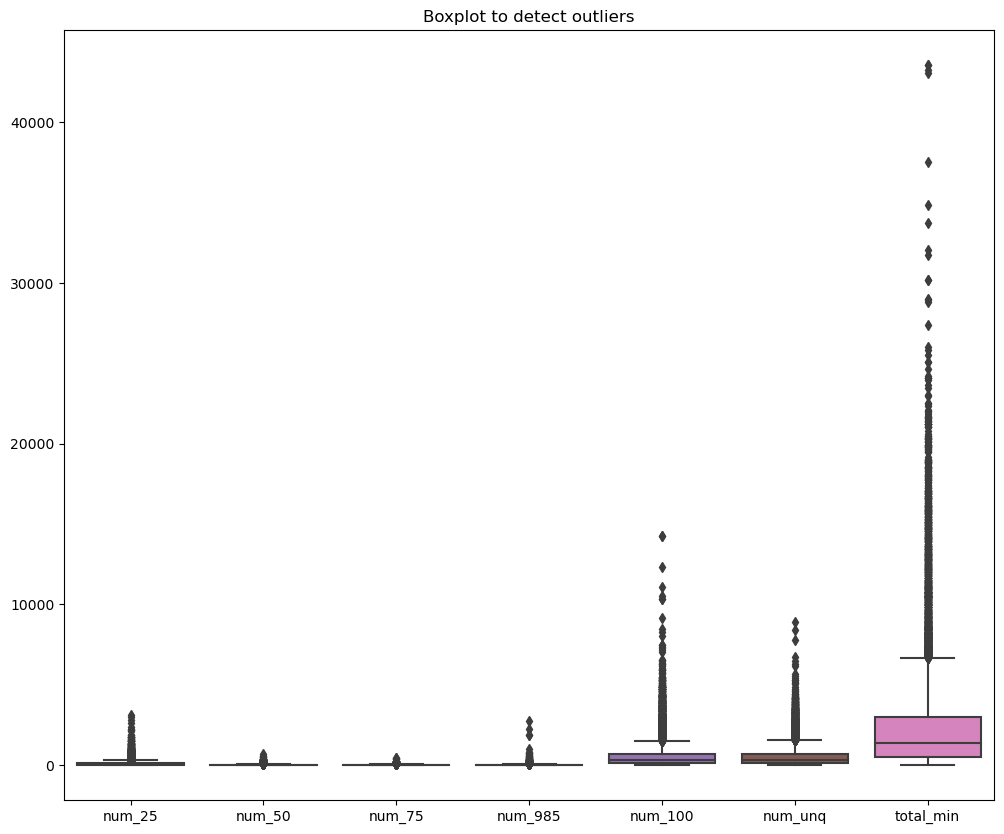

In [11]:
#Creating Box Plot to visualize the distribution of the variables related to usability
plt.figure(figsize=(12,10))
sns.boxplot(data = df[['num_25', 'num_50', 'num_75', 'num_985','num_100','num_unq', 'total_min']])
plt.title('Boxplot to detect outliers', fontsize=12)
plt.show()

All variables analyzed contains outliers. As total_min appears to have the biggest amount, let's explore a bit further this feature and investigate the number of outliers in this feature. 

In [12]:
# Compute the 25th percentile value in `total_min`
percentile25 = df['total_min'].quantile(0.25)

# Compute the 75th percentile value in `total_min`
percentile75 = df['total_min'].quantile(0.75)

# Compute the interquartile range in `total_min`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `total_min`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Identify subset of data containing outliers in `total_min`
outliers = df[(df['total_min'] > upper_limit) | (df['total_min'] < lower_limit)]

# Count how many rows in the data contain outliers in `total_min`
print("Number of rows in the data containing outliers in `total_min`:", len(outliers))

Number of rows in the data containing outliers in `total_min`: 1375


Although we call these values outliers, they may not be mistakes as it refers to user behavior, thus, drop these values makes no sense. But, by being aware of the presence of outliers in our data, two precautions will be taken: 

* Use median instead of mean to any analysis performed. 
* Carefully choose a model that can easily handle outliers. 

**Data Visualization**

Examining meaningful variables to this project and creating plots to visualize relationships between variables in the data.

In [13]:
df.head()

,user,num_25,num_50,num_75,num_985,num_100,num_unq,total_min,payment_plan_days,is_auto_renew,transaction_date,age,gender,is_churn,plan_type,end_trial,transaction_day,last_day
0,BtvdmgYsrARGNgK4ZHjdMQhwcZ33esLoMuCRO3D3n5g=,1,0,0,0,3,1,12,30,1,2017-03-07,0,NaN,0,Plus,2017-04-06,7,6
1,hxktQbNc3D9m7B4lkAc+S0SlV2vK7JcJubx4d2mRgBg=,226,63,47,40,1647,1390,7136,30,1,2017-03-31,22,male,0,Premium,2017-04-30,31,30
2,NXulo2V/zXNPvMhExku0RiLD+BigJarvCTesSHH562s=,7,1,1,2,462,358,2118,30,1,2017-03-04,33,male,0,Plus,2017-04-03,4,3
3,H6bBesLZsdcBcYDQnoXCuQ0/ANe/peqzg9KRlwycpuQ=,191,23,12,19,242,347,1086,30,0,2017-03-01,25,female,0,Elite,2017-03-31,1,31
4,VFcm7LNceIUkdI/w16ysQ6gPB398UTFzzLEmVZIUC7U=,68,9,1,2,151,163,652,30,1,2017-03-24,28,female,0,Plus,2017-04-23,24,23


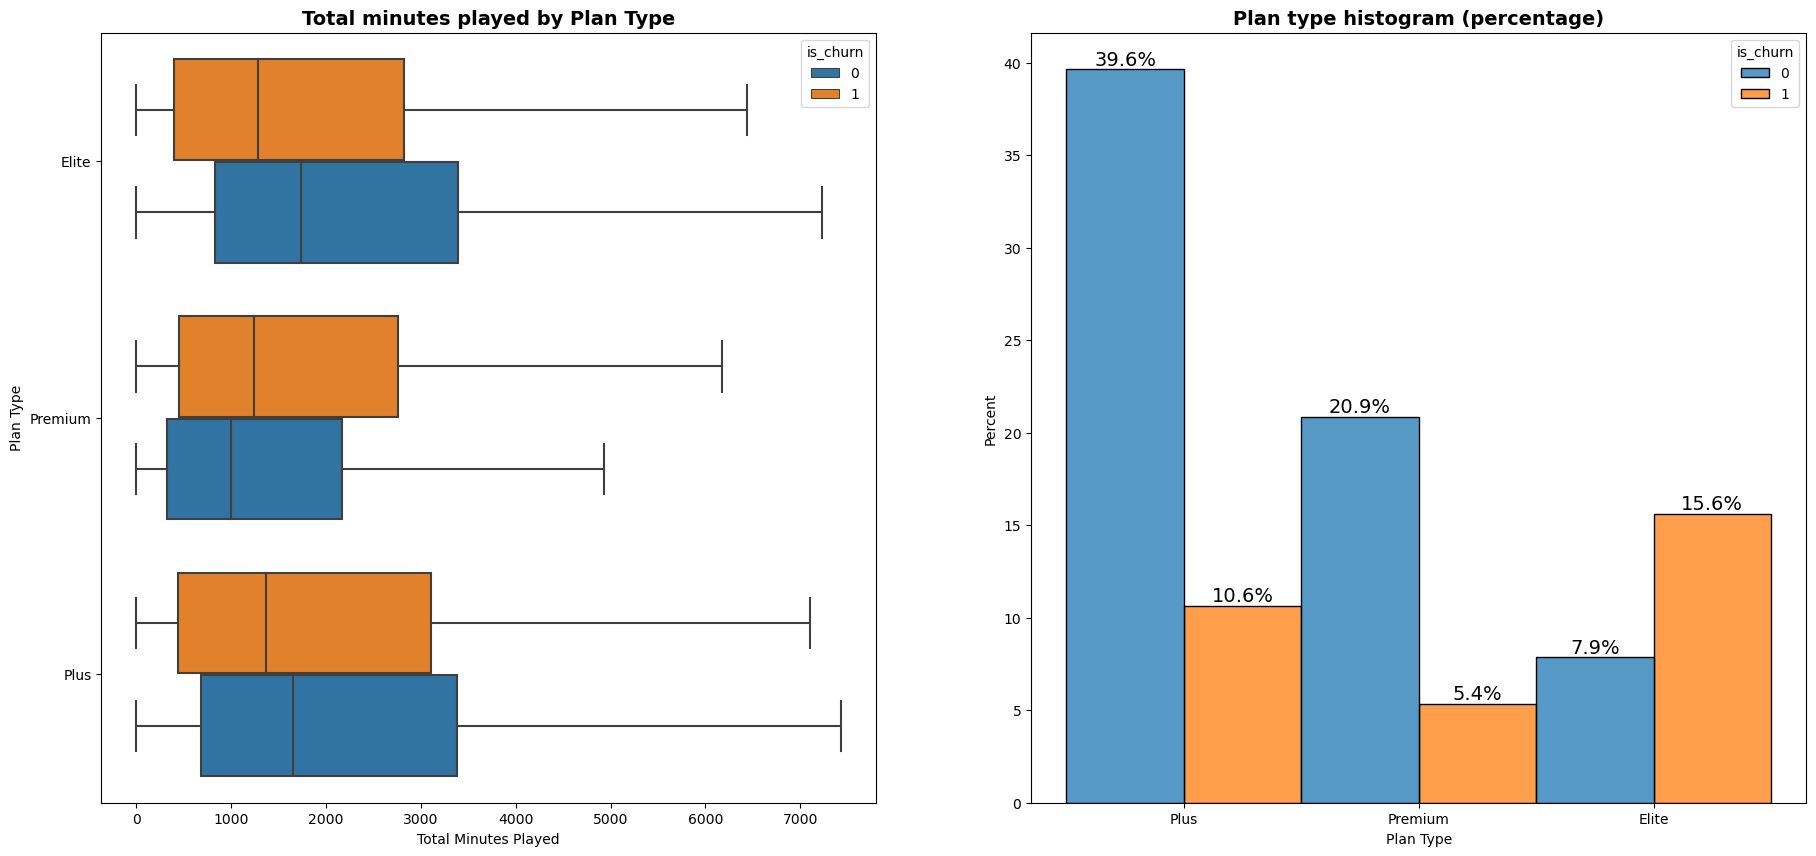

In [14]:
#setting figure and axes 
fig, ax = plt.subplots(1, 2, figsize=(22,10))

#creating boxplot showing 'total_min' distributions for 'plan_type' comparing members that stayed versus churned
sns.boxplot(data = df, x='total_min', y='plan_type', hue='is_churn',showfliers = False, orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Total minutes played by Plan Type', fontsize='14', fontweight='bold')
ax[0].set_xlabel('Total Minutes Played')
ax[0].set_ylabel('Plan Type')
#creating histogram showing 'plan_type' distribution comparing members that stayed versus churned
sns.histplot(data=df, x='plan_type', hue='is_churn', multiple='dodge', stat='percent', ax=ax[1])
ax[1].set_title('Plan type histogram (percentage)', fontsize='14', fontweight='bold')
ax[1].set_xlabel('Plan Type')

for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                   ha='center', va='bottom', fontsize='14')

#Display the plots
plt.show()

A few things stand out from this plot: 

1. Regardless plan type and whether they have stayed or not, members have almost similar behaviour regarding total time during the trial time.

2. Plan Elite have higher percentage of churns.

3. Regarding Premium Plan, users who churned spent more time using the streaming service during trial.

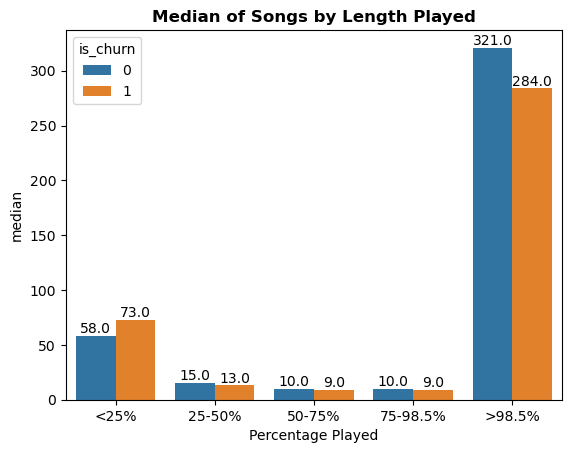

In [15]:
#grouping data by 'is_churn' and calculating median of the num_X values

user_behavior = df.groupby('is_churn').agg({'num_25': 'median',
                                            'num_50': 'median',
                                            'num_75': 'median',
                                            'num_985': 'median',
                                            'num_100': 'median'}
                                            ).reset_index().melt(id_vars='is_churn', var_name='length_played', value_name='median')
                                                 
ax = sns.barplot(data= user_behavior, x='length_played',y='median', hue='is_churn')
ax.set_title('Median of Songs by Length Played',  fontweight='bold')
ax.set_xlabel('Percentage Played')
ax.set_xticklabels(['<25%','25-50%','50-75%','75-98.5%','>98.5%'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height),
                   ha='center', va='bottom')


plt.show()

Those who churned skip more songs before it achieves 25% than members who stayed.  

Even though, the number of songs listened entirely by members that left are still the biggest median. This is interesting because it may be the fact that the songs they enjoy are in the streaming library, but somehow they have more difficult finding it. However, this is only a hypothesis that should be further analyzed . 

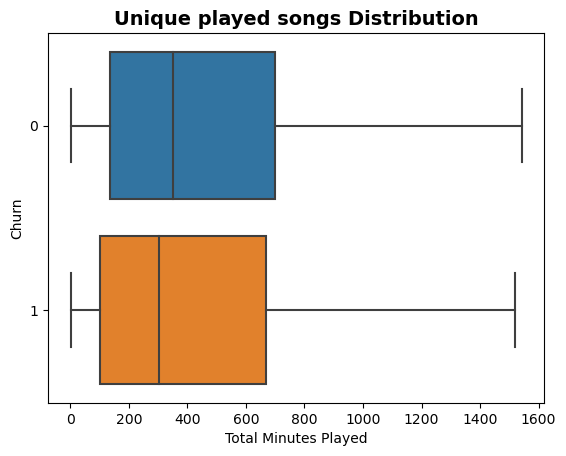

In [16]:
ax = sns.boxplot(data = df, x='num_unq', y='is_churn',showfliers = False, orient="h")

ax.set_title('Unique played songs Distribution', fontsize='14', fontweight='bold')
ax.set_xlabel('Total Minutes Played')
ax.set_ylabel('Churn')

plt.show()

Analyzing once more the medians, members who stayed listened slightly more unique songs.

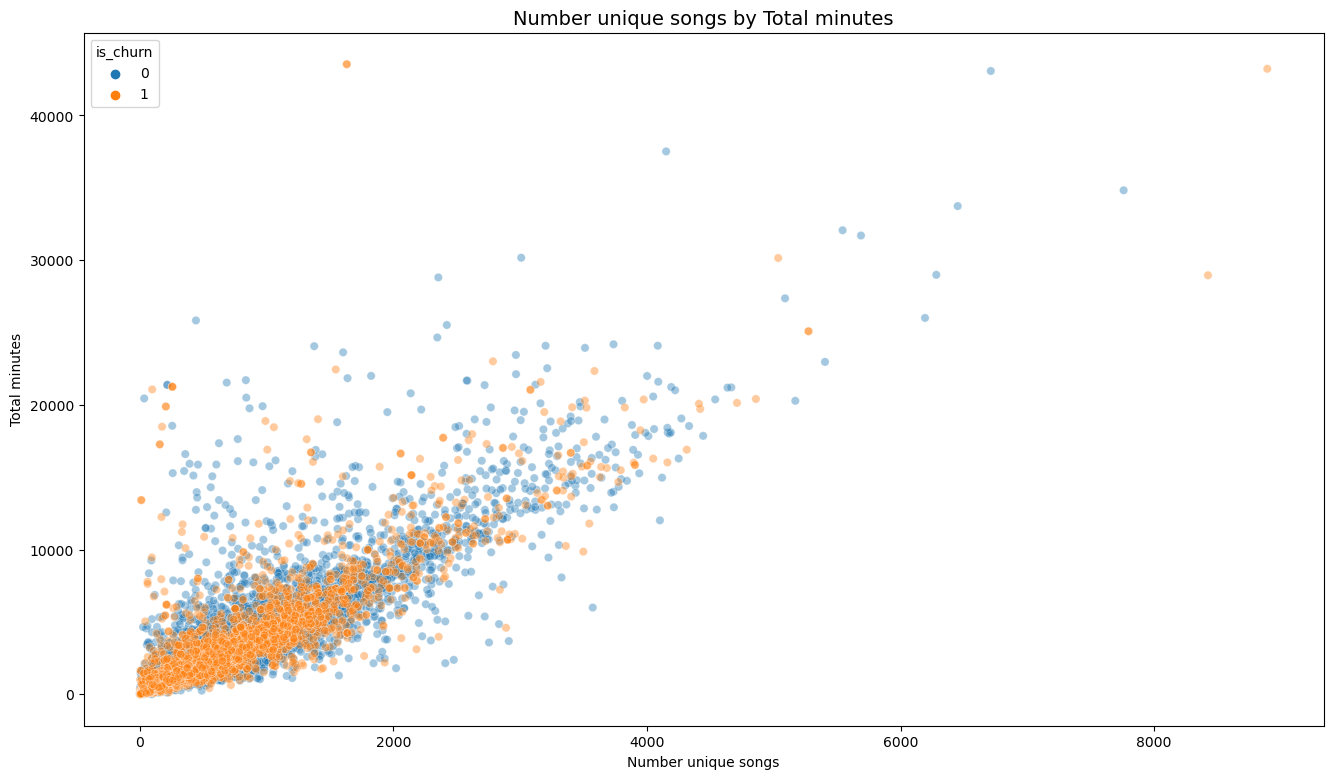

In [17]:
#creating scatterplot num_unq x total_min

plt.figure(figsize=(16, 9))
ax = sns.scatterplot(data=df, x='num_unq', y='total_min', hue='is_churn', alpha=0.4)
ax.set_title('Number unique songs by Total minutes', fontsize='14')
ax.set_xlabel('Number unique songs')
ax.set_ylabel('Total minutes')
plt.show()

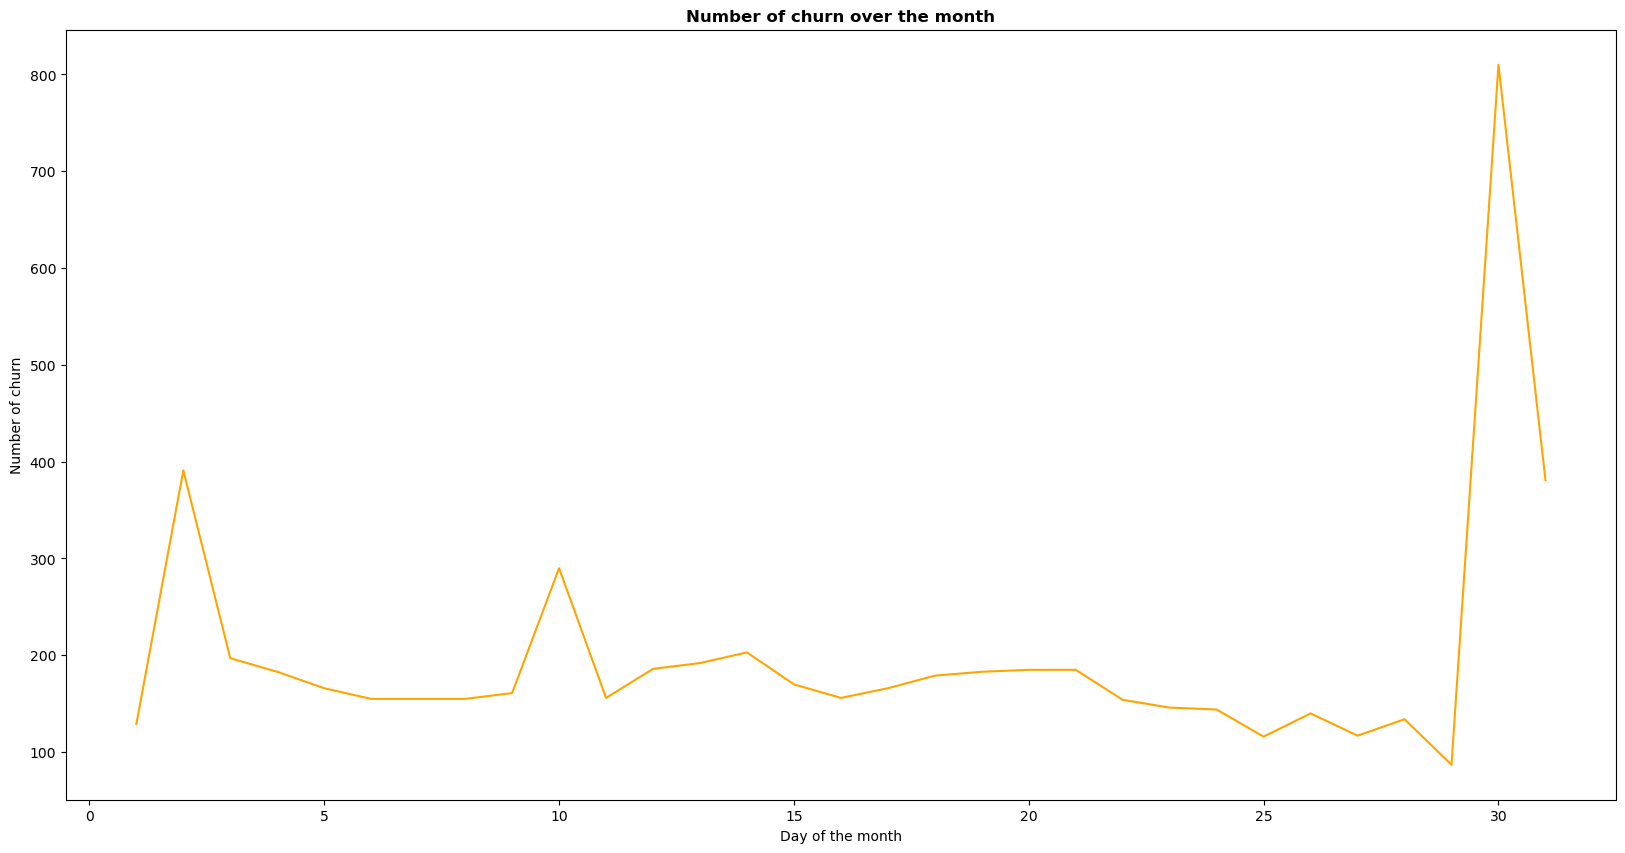

In [18]:
#creating a lineplot with number of churns by day of the month

churn_by_date = df.groupby(['last_day', 'is_churn'])['user'].size(
                                                              ).reset_index()

plt.figure(figsize=(20,10))
ax = sns.lineplot(data = churn_by_date[churn_by_date['is_churn']==1], x='last_day', y='user', color='Orange')
ax.set_title('Number of churn over the month', fontweight='bold')
ax.set_xlabel('Day of the month')
ax.set_ylabel('Number of churn')


plt.show()

The point of plotting this graph is that since most Brazilians (the streaming company operates in Brazil) receive payment on the fifth working day of the month, dates close to payday, i.e. at the late and early part of the month, would have higher churn rates. 

That pattern seems to be true when we take a look at this graph. Thus, the day that the last day of trial lies, which is also when the decision of whether continue as member or not is made, might be important to the users decision. 



Lastly, let's check for correlation between the variables in the data.

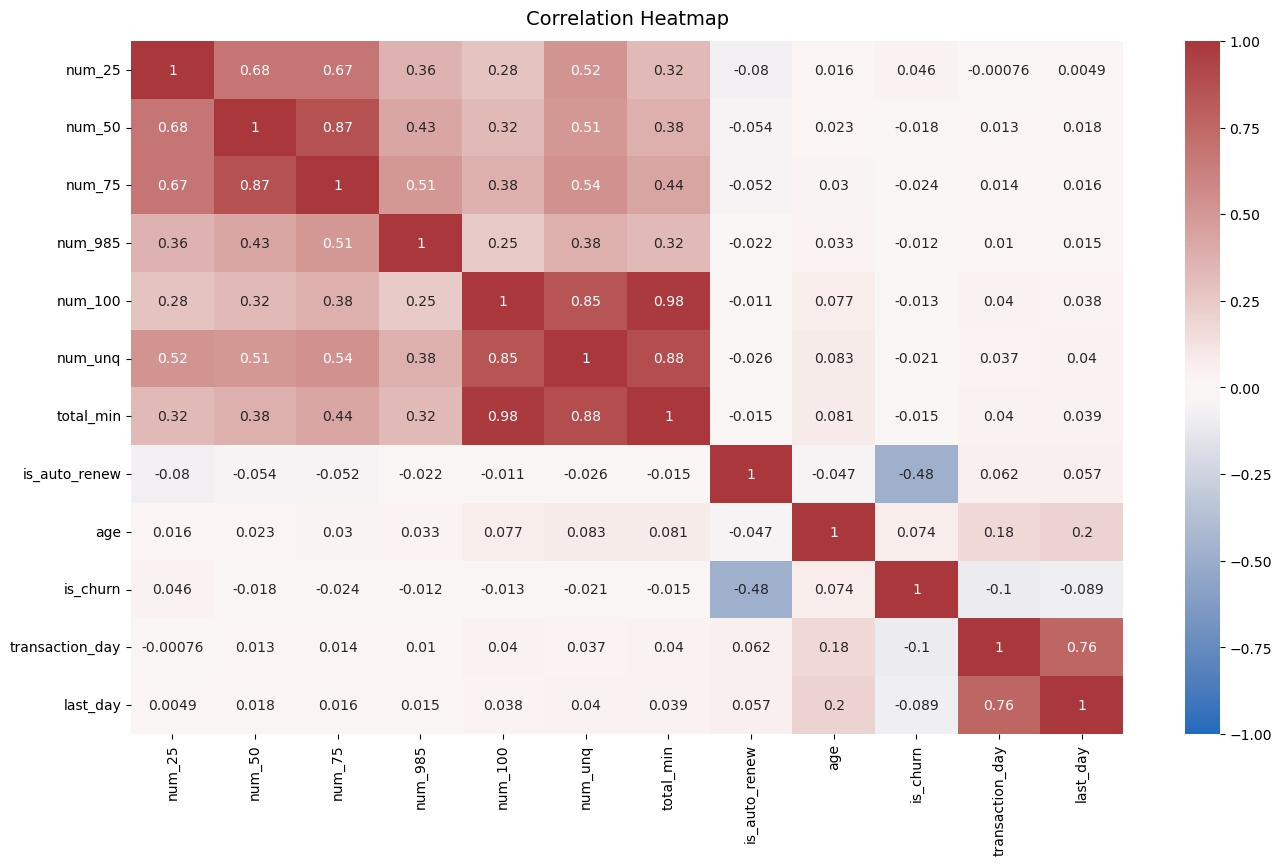

In [19]:
# Plot a correlation heatmap
df0= df.drop('payment_plan_days',axis=1)

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

1. The data has some strong correlation between the predictors variables, this is also something to consider when choosing the model. 



## Step3. Model building, Step. 4 Evaluation and Results

This task's goal is the prediction of whether a user will churn or not after the 30 days trial, so this involves binary classification, since the outcome can be either 1 (indicating the user left) or 0 (indicating the user stayed). 

As it was found out during EDA, this dataset contains outliers and correlation between some of the predictors variable, therefore the model chosen must be able to handle outliers and collinearity. Besides, a model that is transparent would be most valuable in order to deeper analyze the reasons of way user are leaving the streaming service during trial time. 

That said, **Tree-based** models suit our goal and requirements. 

### Feature Engineering 

Preparing the dataset for modeling. At this stage, let's select the features that will be most valuable to the model as well as transform those that need to be. Any feature will be extract for the first model aiming to see how the models performs this way. 

**Feature Select**: 

* The features "user" and "payment_plan_days" have no important values to this model, so it'll be dropped. 

* For ethical reasons, any strategy of retention or marketing should be based on the user's gender and/or age, so the features "gender" and "age" will be dropped. 

* "transaction_date" and "end_trial" are redundant information, so it'll also be dropped. 

In [20]:
#dropping features from the modeling dataset 

df_subset = df.drop(columns=['user','payment_plan_days','gender','age','transaction_date','end_trial'], axis=1)

**Feature Transformation**:

* The only transformation needed for now is convert the categorical feature "plan_type" to numerical. It'll be done with One-hot encoding. 

In [21]:
#one hot enconding plan_type feature

df_subset = pd.get_dummies(df_subset, prefix= ['plan'], columns=['plan_type'])

### Evaluation Metric

Before modelling, let's decide on the evaluation metric. 

In [22]:
#checking on how the dataset is balanced
stayed, churned = df_subset['is_churn'].value_counts()
print('Stayed: ', round(stayed/len(df_subset),3 ))
print('Churned: ', round(churned/len(df_subset),3))

Stayed:  0.684
Churned:  0.316


The dataset is not balanced but as major problems starts to appear when one class is 90%, the dataset will be left this way and we can keep evaluating it. 

Now, considering the cost of both models erros: 

* False Positives: the model predicts a user will leave when in fact they won't. 

* False Negatives: the model predicts a user will stay when in fact they won't.

Since our goal in constructing this model is to draw strategies to increase retention after trial time, False Negatives are more expensive to the company, because an error of direction on whom apply these strategies can cause an user leaving. 

Therefore, **Recall** will be the main metric for evaluation.

### Model building

In [23]:
#import packages

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

import pickle

**Spliting the data into Train, Validate and Test**



![](https://raw.githubusercontent.com/adacert/churn/main/optimal_model_flow.svg)

In [24]:
#creating predictors and target (x and y) subsets

y = df_subset[['is_churn']]

x = df_subset.copy()
x = x.drop('is_churn', axis =1)

#creating Test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state= 42)

#creating train and validate data

x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

**Baseline Model**: The aim here is assess the initial performance of the Tree-based model, get a sense of how predictive the data is and further compare it with more advanced models to determine if the additional complexity and computational cost of the ensemble model are justified. 

In [25]:
#building Baseline Model

#instaatiate the model 
tree = DecisionTreeClassifier(random_state = 0)

#dictionary of hiperparameters
cv_params = {'max_depth':[3,5, 7, None],
             'min_samples_leaf': [1, 2, 5],
             'min_samples_split': [2, 4, 6]
             }
#dictionary of scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

## Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='recall')

In [26]:
%%time

#fitting
tree1_model = tree1.fit(x_tr, y_tr)

Wall time: 14.6 s


In [27]:
#checking the best params
tree1_model.best_params_

{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [28]:
#checking the best Recall across cross validation
tree1_model.best_score_

0.7506240027236667

In [29]:
#function to get the scores and storage in a table

def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How the model will be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1,  and accuracy scores for the model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    accuracy = round(metrics.accuracy_score(y_test_data, preds), 3)
    precision = round(metrics.precision_score(y_test_data, preds), 3)
    recall = round(metrics.recall_score(y_test_data, preds), 3)
    f1 = round(metrics.f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

In [30]:
#table of scores on validation data
tree1_model_results = get_scores('Decision Tree 1', tree1_model, x_val, y_val)
tree1_model_results

,model,precision,recall,f1,accuracy
0,Decision Tree 1,0.768,0.746,0.757,0.848


The model has satisfatory scores, but we can keep working to improve it by adopting other model and adjusting tuning hyperparameters.

In [31]:
#defining function to write and read the models

def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        

def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [32]:
#saving the model 

path = 'C:/Users/muril/Documents/Murillo_projetos/churn_streming'

write_pickle(path, tree1_model, 'tree1_model')

**Random Forest Model**

Let's see if a more advanced model increases the scores. 

In [33]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

#dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0, 2.0, 3.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [50, 100, 200],
             }  

#dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [34]:
%%time

#fitting
rf1_model = rf1.fit(x_tr, y_tr)

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muril\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Wall time: 1h 3min 44s


In [35]:
write_pickle(path, rf1_model, 'rf1_model')

In [36]:
#checking best params
rf1_model.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [37]:
#checking best recall score on CV
rf1_model.best_score_

0.7632873612016948

In [38]:
rf1_results = get_scores('Random Forest 1', rf1_model, x_val, y_val)

results = pd.concat([tree1_model_results, rf1_results])
results

,model,precision,recall,f1,accuracy
0,Decision Tree 1,0.768,0.746,0.757,0.848
0,Random Forest 1,0.740,0.770,0.755,0.842


**XGBoost**

In [39]:
#imprt packages
from xgboost import XGBClassifier
from xgboost import plot_importance

In [40]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)  

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [2,4,6,8], 
             'min_child_weight': [1, 3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [200, 300, 500]
             }   

#Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [41]:
%%time

#fitting
xgb1_model = xgb1.fit(x_tr, y_tr)

Wall time: 14min 3s


In [42]:
#checking params
xgb1_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 200}

In [43]:
#checking f1 best score
xgb1_model.best_score_

0.7898725947438153

In [45]:
xgb_results = get_scores('XGBoost', xgb1_model, x_val, y_val)

results = pd.concat([results, xgb_results])
results

,model,precision,recall,f1,accuracy
0,Decision Tree 1,0.768,0.746,0.757,0.848
0,Random Forest 1,0.740,0.770,0.755,0.842
0,XGBoost,0.726,0.798,0.760,0.841


In [46]:
#pickling model
write_pickle(path, xgb1_model, 'xgb1_model')

Let's analyze the models a bit further.

**Confusion Matrix**

In [47]:
#define a function to plot confusion matrix

def confusion_matrix_plot(model, x_test, y_test):
    
    '''
    This function generate and plot the confusion matrix 
    Arguments: model: your fitted model 
               x_test: the predictors variables test set
               y_test: the target variable test set
    '''
    y_preds = model.predict(x_test)
    
    cm = metrics.confusion_matrix(y_test, y_preds, labels = model.classes_)
    
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = model.classes_)
    
    plot_cm = disp.plot()
    
    return plot_cm

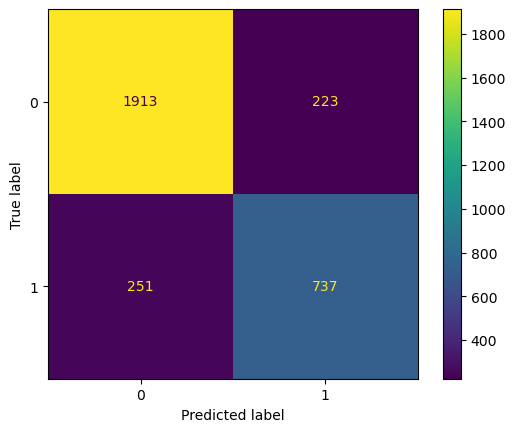

In [48]:
#Confusion matrix Decision Tree 
confusion_matrix_plot(tree1_model, x_val, y_val)

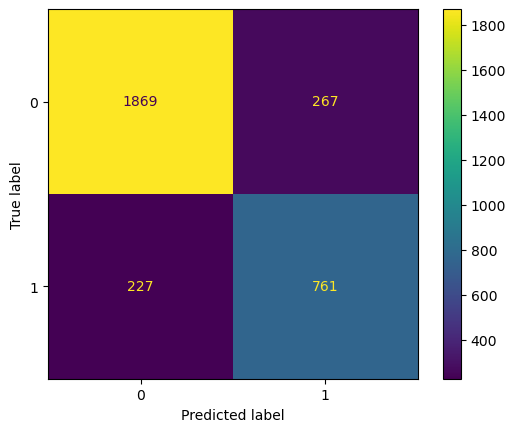

In [49]:
#Confusion Matrix Random Forest 
confusion_matrix_plot(rf1_model, x_val, y_val)

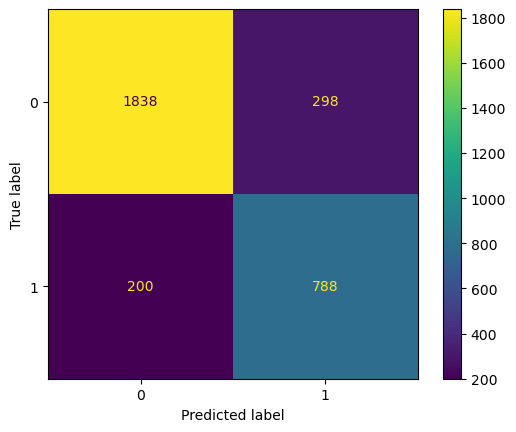

In [50]:
#Confusion Matrix XGBoost
confusion_matrix_plot(xgb1_model, x_val, y_val)

XGBoost model has the lowest number of False Negatives what in our scenario case, it's most desirable.

**Features Importance**

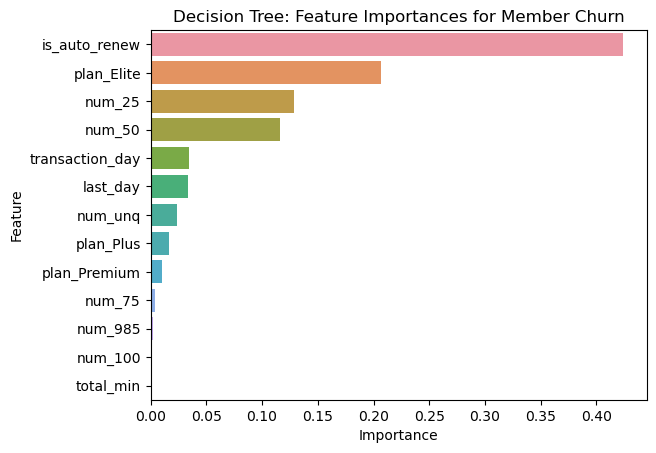

In [51]:
#feature importance Decision Tree 1 model
tree1_importances = pd.DataFrame(tree1_model.best_estimator_.feature_importances_, columns=['gini_importance'], index=x.columns)
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Member Churn", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

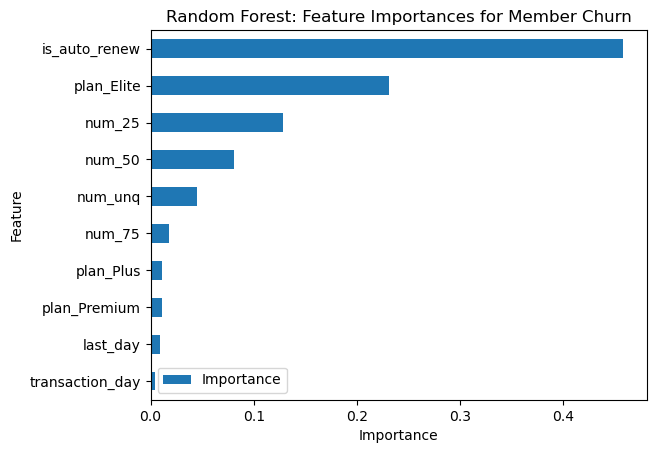

In [52]:
#feature importance for Random Forest 1
# Get feature importances
rf_importances = rf1_model.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1_model.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = x.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
rf_importances = rf_importances[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":rf_importances})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Member Churn", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

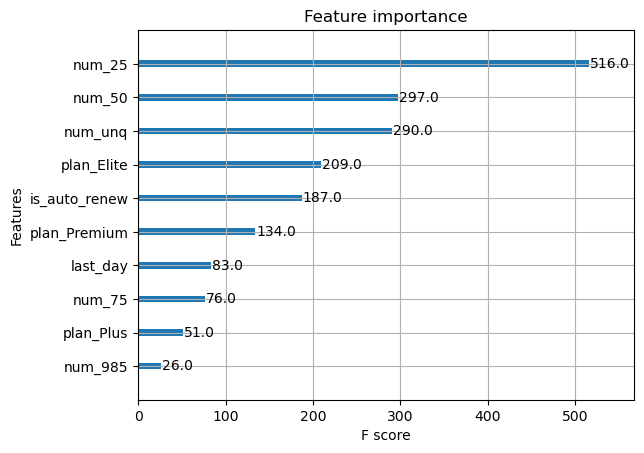

In [53]:
#feature importance XGBoost

plot_importance(xgb1_model.best_estimator_, max_num_features=10)

**Summary of models**

In [54]:
results

,model,precision,recall,f1,accuracy
0,Decision Tree 1,0.768,0.746,0.757,0.848
0,Random Forest 1,0.740,0.770,0.755,0.842
0,XGBoost,0.726,0.798,0.760,0.841


XGBoost model achieved almost 80% of recall and modelslightly outperformed the other two models. This is not yet a perfect model but, it's a start. More analysis can be done, new features can be extracted or incorporated to the dataset. Therefore, this is chosen one. Let's see the results of this models with test data.

In [56]:
xgb_test = get_scores('XGBoost',xgb1_model, x_test, y_test)
xgb_test

,model,precision,recall,f1,accuracy
0,XGBoost,0.733,0.763,0.748,0.837


**Conclusions, Recommendations**

Based on the EDA and the features importances extract from the models, the following recommendations could be presented to stakeholders: 

* Send reminder message/email when the renew day is coming.
* Evaluate the cost-benefit relationship between the plans offered.
* Analyze if Recommendation System and app is working well for all the users.
* Analyze the most common payday in the regions where the service operates and offer extra trial days when the renew day lies right before payday.  

**Next Steps**

Get data about user preferences and information on interaction with the platform in each login to improve the model performance and get more insights on users retention.  